In [1]:
import pandas as pd

In [2]:
internal_df = pd.read_excel("Internal_Bank_Dataset.xlsx")
external_df = pd.read_excel("External_Cibil_Dataset.xlsx")
unseen_df   = pd.read_excel("Unseen_Dataset.xlsx")

In [3]:
print("Internal Bank Dataset:")
print(internal_df.head(), "\n")

print("External Cibil Dataset:")
print(external_df.head(), "\n")

print("Unseen Dataset:")
print(unseen_df.head(), "\n")

print("Internal columns:", internal_df.columns.tolist())
print("External columns:", external_df.columns.tolist())

Internal Bank Dataset:
   PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  ...  CC_TL  Consumer_TL  Gold_TL  Home_

In [4]:
internal_path = Path("Internal_Bank_Dataset.xlsx")
external_path = Path("External_Cibil_Dataset.xlsx")
unseen_path = Path("Unseen_Dataset.xlsx")   
merged_save_path = Path("merged_internal_external.csv")
merge_key = "PROSPECTID"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
if merge_key not in internal_df.columns or merge_key not in external_df.columns:
    raise KeyError(f"Merge key '{merge_key}' missing in one of the files.")

print("Shapes: internal:", internal_df.shape, "external:", external_df.shape, "unseen:", unseen_df.shape)

Shapes: internal: (51336, 26) external: (51336, 62) unseen: (100, 42)


In [6]:
int_dup_count = internal_df[merge_key].duplicated().sum()
ext_dup_count = external_df[merge_key].duplicated().sum()
print(f"Duplicate PROSPECTID count -> internal: {int_dup_count}, external: {ext_dup_count}")

Duplicate PROSPECTID count -> internal: 0, external: 0


In [7]:
if int_dup_count:
    print("Sample duplicate PROSPECTIDs in internal:\n", internal_df[internal_df[merge_key].duplicated()][merge_key].unique()[:10])
if ext_dup_count:
    print("Sample duplicate PROSPECTIDs in external:\n", external_df[external_df[merge_key].duplicated()][merge_key].unique()[:10])

In [8]:
SENTINEL = -99999
internal_df.replace(SENTINEL, np.nan, inplace=True)
external_df.replace(SENTINEL, np.nan, inplace=True)
unseen_df.replace(SENTINEL, np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
merged_df = pd.merge(internal_df, external_df, on=merge_key, how="inner", suffixes=("_int", "_ext"))
print("Merged (inner) shape:", merged_df.shape)
print("Merged columns example:", merged_df.columns.tolist()[:20])
print("Merged sample rows:")
print(merged_df.head())
merged_df.to_csv(merged_save_path, index=False)
print("Merged dataset saved to:", merged_save_path)

Merged (inner) shape: (51336, 87)
Merged columns example: ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL']
Merged sample rows:
   PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.0

In [11]:
indicator = pd.merge(internal_df[[merge_key]], external_df[[merge_key]], on=merge_key, how="outer", indicator=True)
print("Merge indicator counts (outer join):")
print(indicator['_merge'].value_counts().to_dict())  

Merge indicator counts (outer join):
{'both': 51336, 'left_only': 0, 'right_only': 0}


In [12]:
if merge_key in unseen_df.columns:
    print("Unseen dataset contains PROSPECTID. You can merge predictions on that key later.")
else:
    print("Unseen dataset does NOT contain PROSPECTID (contains only features). Keep unseen_df separate and apply same preprocessing pipeline before scoring.")

Unseen dataset does NOT contain PROSPECTID (contains only features). Keep unseen_df separate and apply same preprocessing pipeline before scoring.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# merged_path = "merged_internal_external.csv"
df = pd.read_csv(merged_path)

In [15]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes.value_counts())
print("\nTarget variable distribution (Approved_Flag):\n", df['Approved_Flag'].value_counts())

Shape: (51336, 87)

Columns:
 ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'time_since_first_deliquency', 'time_since_recent_deliquency', 'num_times_delinquent', 'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m',

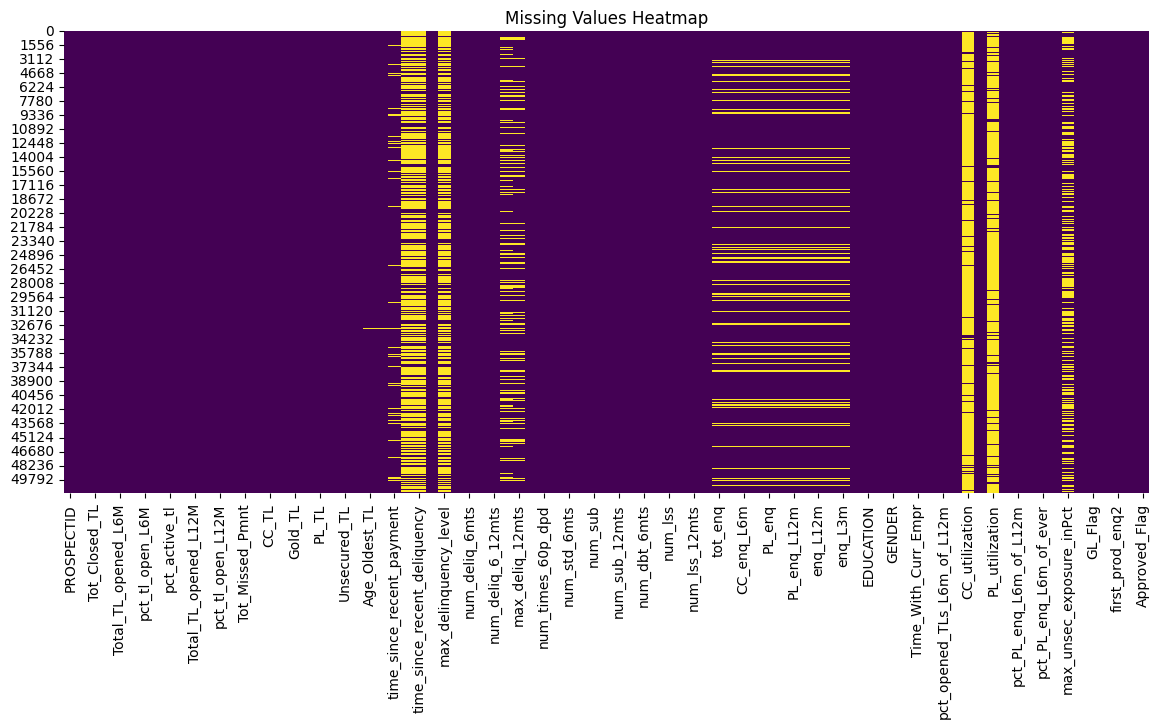

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("\nTop 20 Features with Missing Values:\n", missing_ratio.head(20))


Top 20 Features with Missing Values:
 CC_utilization                  0.927926
PL_utilization                  0.865572
time_since_recent_deliquency    0.700269
max_delinquency_level           0.700269
time_since_first_deliquency     0.700269
max_unsec_exposure_inPct        0.451496
max_deliq_6mts                  0.251091
max_deliq_12mts                 0.211002
tot_enq                         0.123130
CC_enq                          0.123130
CC_enq_L12m                     0.123130
time_since_recent_enq           0.123130
PL_enq                          0.123130
PL_enq_L6m                      0.123130
PL_enq_L12m                     0.123130
CC_enq_L6m                      0.123130
enq_L6m                         0.123130
enq_L3m                         0.123130
enq_L12m                        0.123130
time_since_recent_payment       0.083587
dtype: float64


C:\Users\soure\AppData\Local\Temp\ipykernel_5308\557131879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Approved_Flag', data=df, palette='Set2')


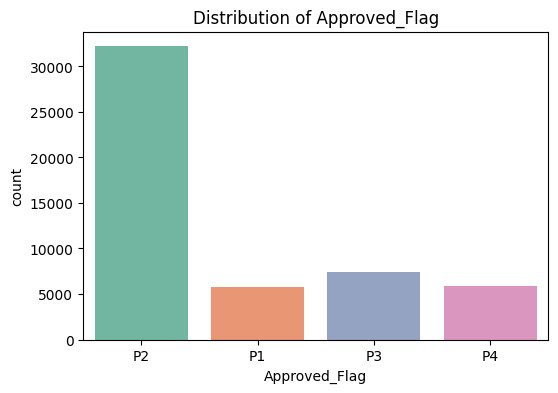

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Approved_Flag', data=df, palette='Set2')
plt.title("Distribution of Approved_Flag")
plt.show()

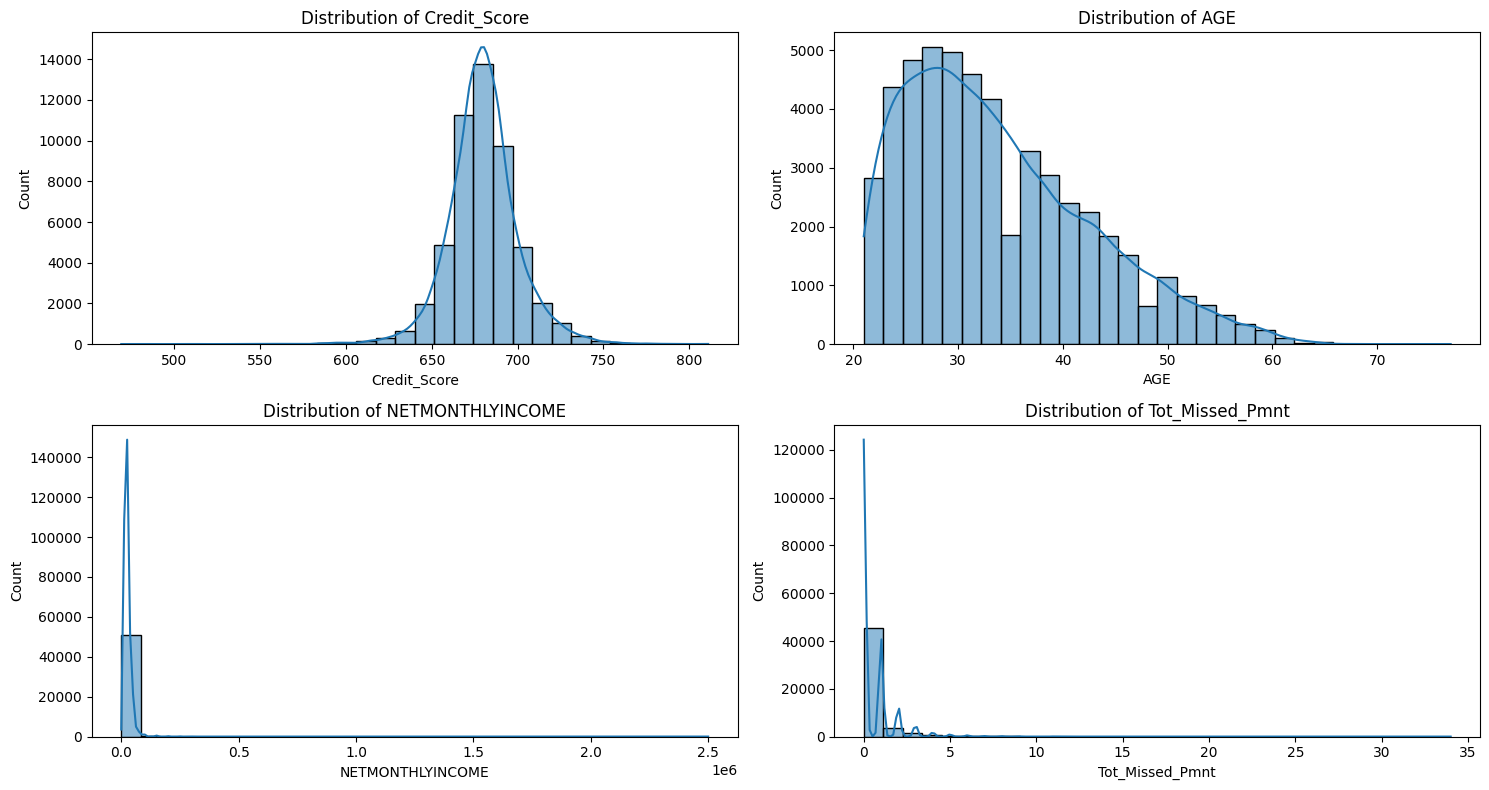

In [19]:
num_cols = ['Credit_Score', 'AGE', 'NETMONTHLYINCOME', 'Tot_Missed_Pmnt']
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

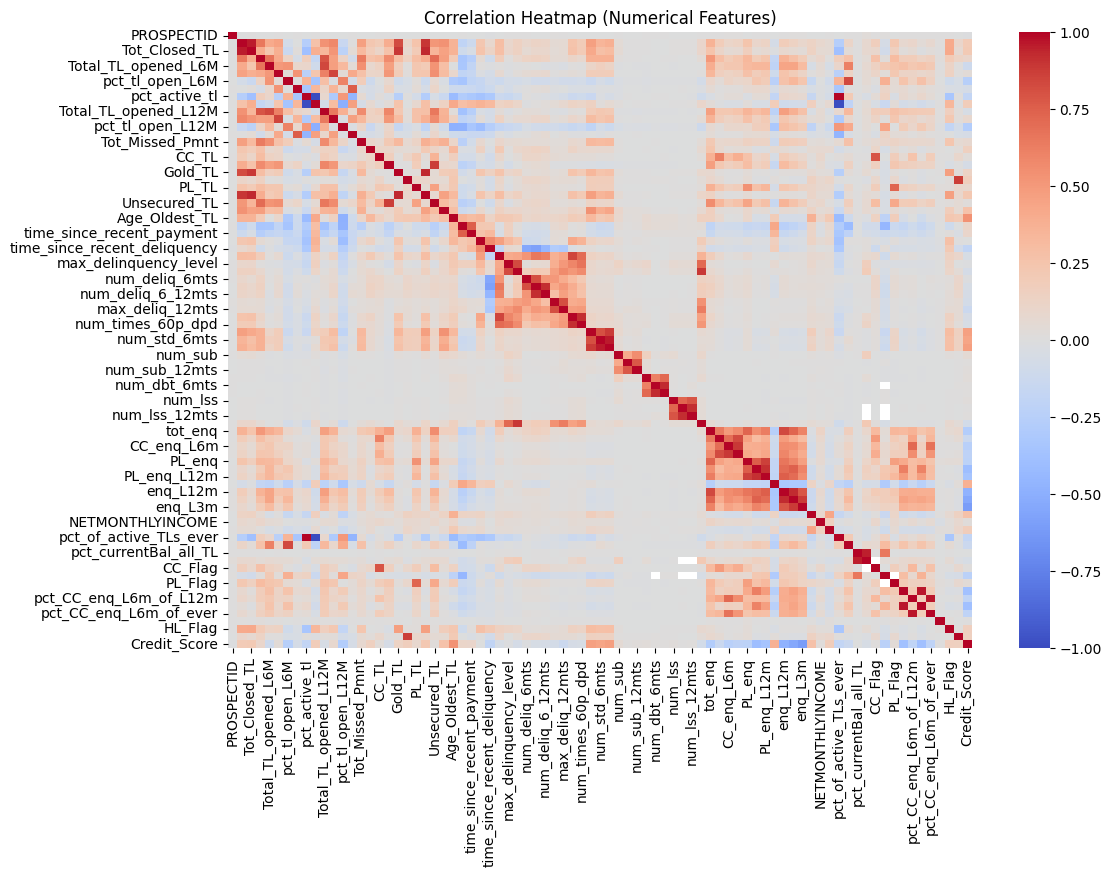

In [20]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

C:\Users\soure\AppData\Local\Temp\ipykernel_5308\3598689588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Approved_Flag", y="Credit_Score", data=df, palette="Set3")


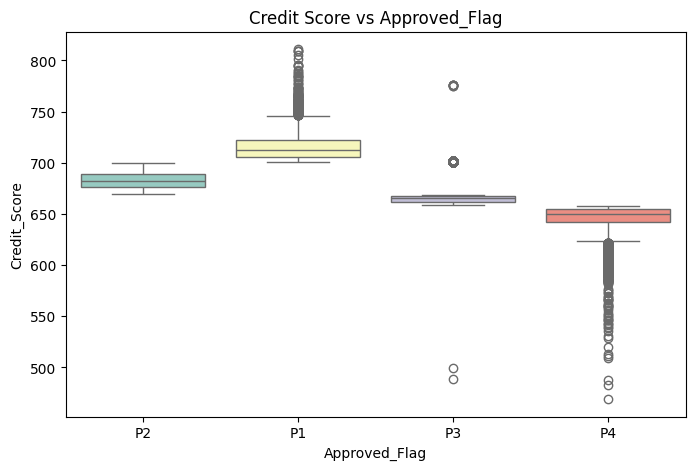

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Approved_Flag", y="Credit_Score", data=df, palette="Set3")
plt.title("Credit Score vs Approved_Flag")
plt.show()

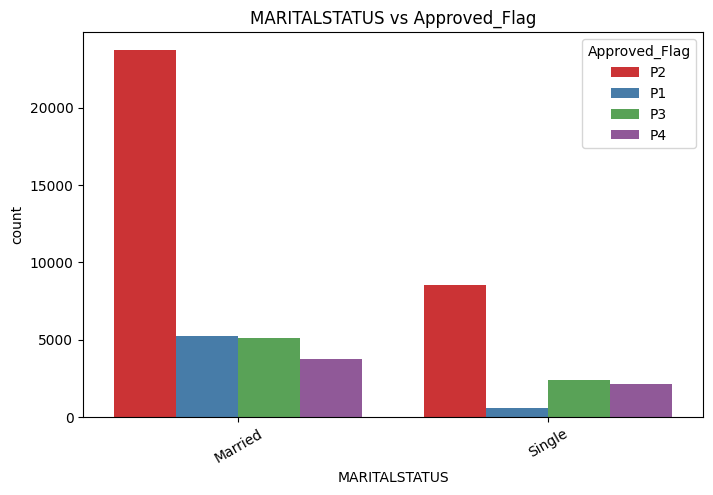

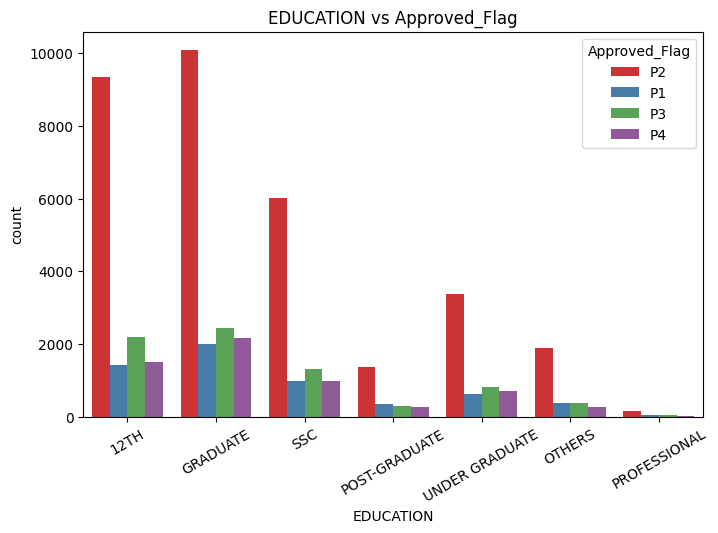

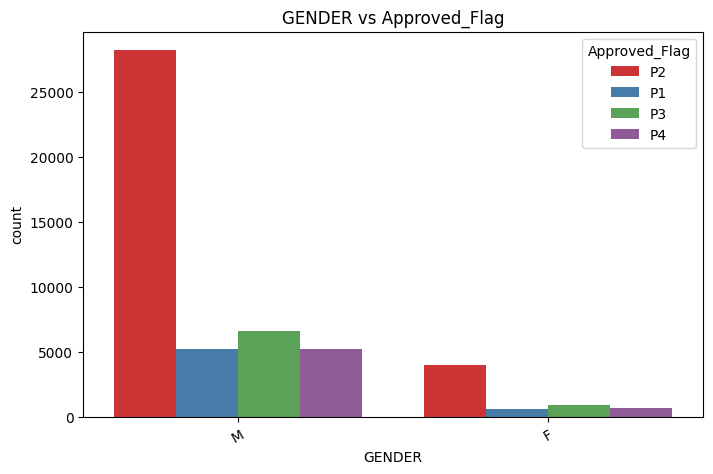

In [22]:
cat_cols = ['MARITALSTATUS', 'EDUCATION', 'GENDER'] # Add two more categorical feature
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Approved_Flag', data=df, palette="Set1")
    plt.title(f"{col} vs Approved_Flag")
    plt.xticks(rotation=30)
    plt.show()

In [28]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [29]:
df_reg = df.copy()


num_cols = df_reg.select_dtypes(include=[np.number]).columns
cat_cols = df_reg.select_dtypes(exclude=[np.number]).columns

In [ ]:
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_reg[col] = df_reg[col].astype(str)  
    df_reg[col] = le.fit_transform(df_reg[col])
    le_dict[col] = le

# print(le_dict)

{'MARITALSTATUS': LabelEncoder(), 'EDUCATION': LabelEncoder(), 'GENDER': LabelEncoder(), 'last_prod_enq2': LabelEncoder(), 'first_prod_enq2': LabelEncoder(), 'Approved_Flag': LabelEncoder()}


In [31]:
imputer = IterativeImputer(random_state=42, max_iter=10, sample_posterior=False) # check random value
df_reg[num_cols] = imputer.fit_transform(df_reg[num_cols])

In [32]:
for col in cat_cols:
    df_reg[col] = le_dict[col].inverse_transform(df_reg[col].astype(int))

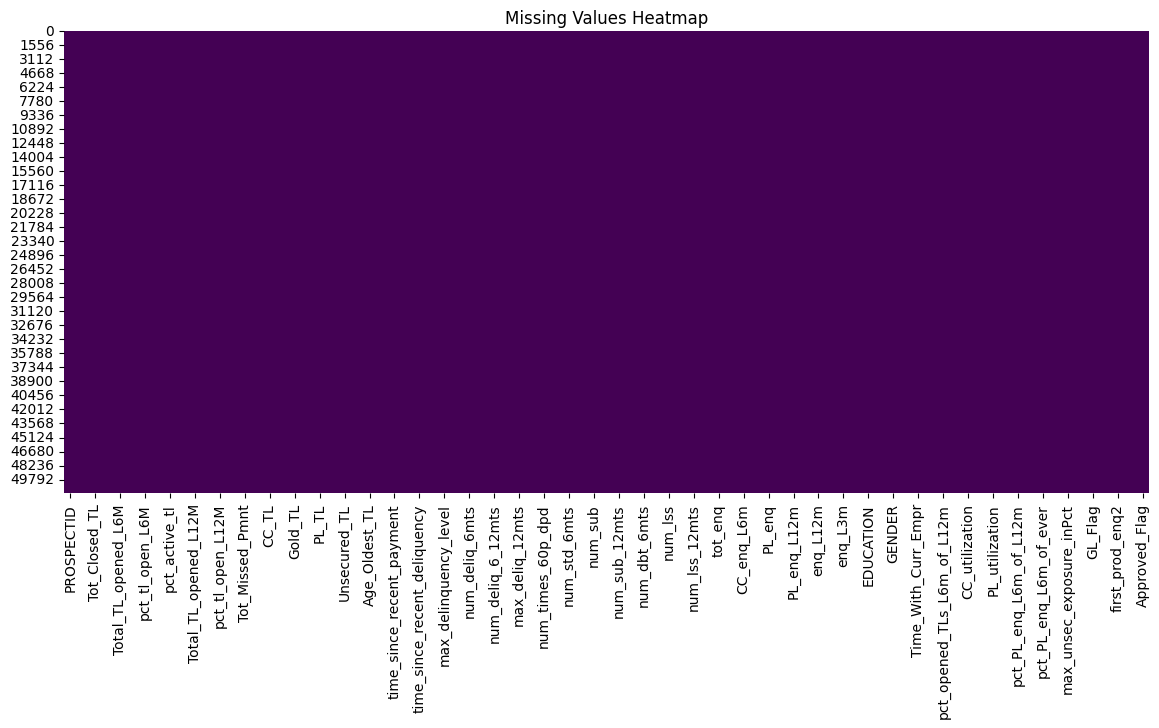

In [33]:
plt.figure(figsize=(14,6))
sns.heatmap(df_reg.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [35]:
df_reg.to_csv("merged_regression_imputed.csv", index=False)
print("Regression-imputed dataset saved as merged_regression_imputed.csv")

Regression-imputed dataset saved as merged_regression_imputed.csv


In [40]:
from scipy.stats import boxcox

df_out = df_reg.copy()
num_cols = df_out.select_dtypes(include=[np.number]).columns

outlier_report = {}
transformation_report = {}


In [41]:
for col in num_cols:
    
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_out[col] < lower) | (df_out[col] > upper)).sum()
    pct_outliers = 100 * outliers / df_out.shape[0]
    outlier_report[col] = pct_outliers



In [42]:
outlier_df = pd.DataFrame.from_dict(outlier_report, orient='index', columns=['% Outliers'])
print("Outlier percentage per numeric column:\n", outlier_df.sort_values('% Outliers', ascending=False))

Outlier percentage per numeric column:
                             % Outliers
max_deliq_6mts               34.424186
max_deliq_12mts              26.591476
CC_enq_L12m                  22.933224
num_std_6mts                 22.043011
pct_PL_enq_L6m_of_ever       21.622253
...                                ...
PROSPECTID                    0.000000
pct_closed_tl                 0.000000
pct_opened_TLs_L6m_of_L12m    0.000000
pct_of_active_TLs_ever        0.000000
HL_Flag                       0.000000

[81 rows x 1 columns]


In [43]:
for col in num_cols:
    skew = df_out[col].skew()
    pct_outliers = outlier_df.loc[col, '% Outliers']

    if pct_outliers > 5:  # Significant outliers
        if skew > 1:  
            # Try Box-Cox (requires strictly positive values)
            if (df_out[col] > 0).all():
                df_out[col], _ = boxcox(df_out[col])  # Box-Cox transform
                transformation_report[col] = f"Box-Cox (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
            else:
                df_out[col] = np.log1p(df_out[col] - df_out[col].min() + 1)
                transformation_report[col] = f"log1p (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
        else:
            # Clip at 1st and 99th percentile
            Q1 = df_out[col].quantile(0.01)
            Q99 = df_out[col].quantile(0.99)
            df_out[col] = df_out[col].clip(Q1, Q99)
            transformation_report[col] = f"Clipped at 1st-99th pct (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
    else:
        transformation_report[col] = "No action (low outliers)"



In [44]:
summary_df = pd.DataFrame.from_dict(transformation_report, orient='index', columns=['Action Taken'])
print("\nSummary of transformations:\n", summary_df)


Summary of transformations:
                                                 Action Taken
PROSPECTID                          No action (low outliers)
Total_TL                  Box-Cox (skew=5.81, outliers=9.5%)
Tot_Closed_TL               log1p (skew=7.41, outliers=9.2%)
Tot_Active_TL                       No action (low outliers)
Total_TL_opened_L6M         log1p (skew=3.42, outliers=7.7%)
...                                                      ...
pct_CC_enq_L6m_of_ever      log1p (skew=3.85, outliers=7.7%)
max_unsec_exposure_inPct  log1p (skew=104.16, outliers=7.6%)
HL_Flag                             No action (low outliers)
GL_Flag                     log1p (skew=4.00, outliers=5.3%)
Credit_Score                        No action (low outliers)

[81 rows x 1 columns]


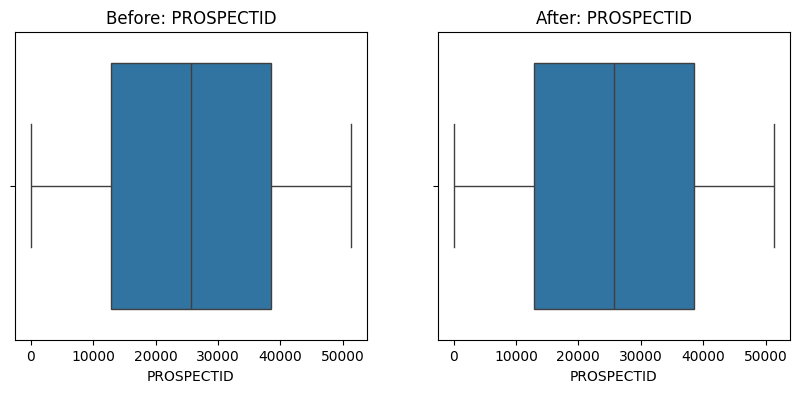

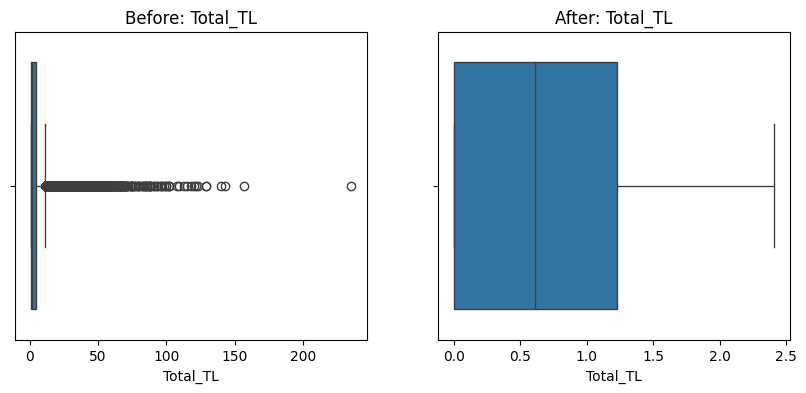

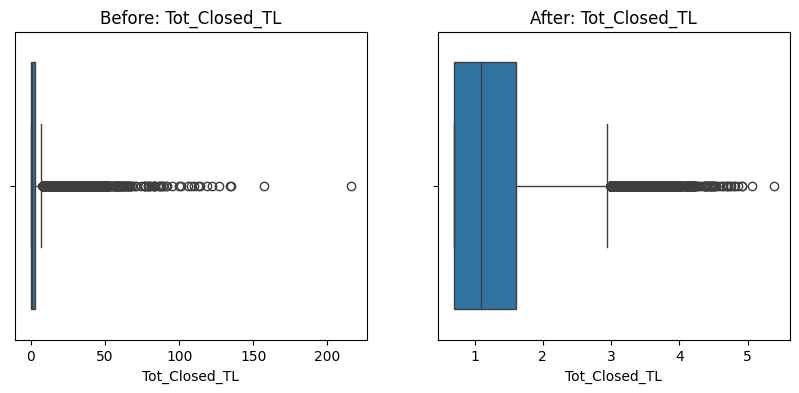

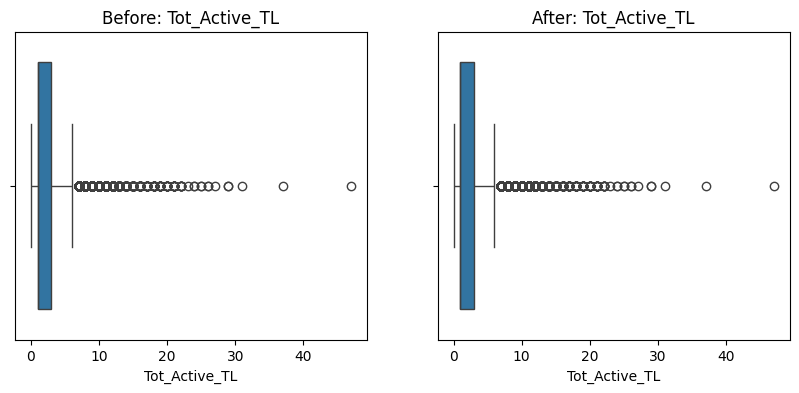

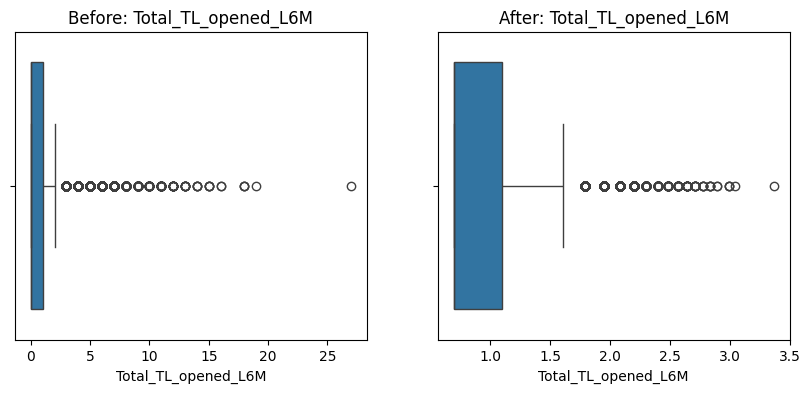

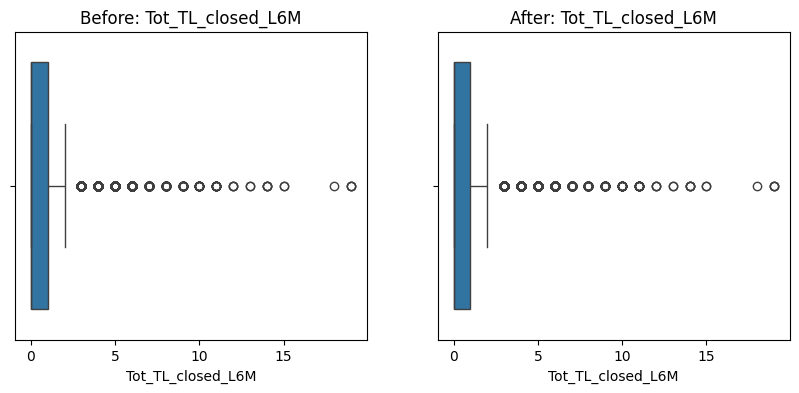

In [45]:
for col in num_cols[:6]:  
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(x=df_reg[col], ax=axes[0])
    axes[0].set_title(f"Before: {col}")
    sns.boxplot(x=df_out[col], ax=axes[1])
    axes[1].set_title(f"After: {col}")
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_regression, f_classif

df_fs = df_out.copy()

In [51]:
possible_targets = ["TARGET", "target", "label", "PerformanceTag", "Target"]
target = None
for col in df_fs.columns:
    if col in possible_targets:
        target = col
        break

if target is None:  
    target = df_fs.columns[-1]   

print(f"Target column detected: {target}")

Target column detected: Approved_Flag


In [52]:
y = df_fs[target]
X = df_fs.drop(columns=[target])

In [53]:
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)


In [54]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [67]:
if len(cat_cols) > 0:
    encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
    X_cat = encoder.fit_transform(X[cat_cols])

    
    chi2_scores, p_values = chi2(X_cat, y)

    feature_names = encoder.get_feature_names_out(cat_cols)

    
    chi2_df = pd.DataFrame({
        "Feature": feature_names,
        "Chi2_Score": chi2_scores,
        "p_value": p_values
    })

    
    chi2_df = chi2_df.sort_values("Chi2_Score", ascending=False).reset_index(drop=True)

    
    k = min(20, X_cat.shape[1])
    top_features = chi2_df.head(k)

    print("\n Chi-square scores (descending order):\n", chi2_df)
    print(f"\n Top {k} categorical features (Chi2):\n", top_features)

    
    selected_cat_features = top_features["Feature"].values
    X_cat_selected = X_cat[:, [list(feature_names).index(f) for f in selected_cat_features]]

else:
    selected_cat_features = []
    X_cat_selected = np.empty((len(X),0))



 Chi-square scores (descending order):
                          Feature   Chi2_Score        p_value
0          last_prod_enq2_others  1442.162964   0.000000e+00
1    last_prod_enq2_ConsumerLoan  1429.132089  1.405043e-309
2           MARITALSTATUS_Single   873.738887  4.396817e-189
3   first_prod_enq2_ConsumerLoan   746.072479  2.144525e-161
4             first_prod_enq2_HL   301.138662   5.640646e-65
5         first_prod_enq2_others   294.857069   1.290661e-63
6              last_prod_enq2_HL   292.474225   4.231459e-63
7              last_prod_enq2_PL   275.775158   1.737678e-59
8             first_prod_enq2_PL   220.370914   1.669316e-47
9             first_prod_enq2_CC   110.493012   8.594752e-24
10            EDUCATION_GRADUATE    52.232754   2.671783e-11
11       EDUCATION_POST-GRADUATE    41.475971   5.182769e-09
12              EDUCATION_OTHERS    23.038258   3.964826e-05
13        EDUCATION_PROFESSIONAL    23.008570   4.021727e-05
14                 EDUCATION_SSC    19.35874

In [68]:
if len(num_cols) > 0:
    X_num = X[num_cols]
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num)

    
    if len(np.unique(y)) > 10:  
        scores, p_values = f_regression(X_num_scaled, y)
    else:  
        scores, p_values = f_classif(X_num_scaled, y)

    
    anova_df = pd.DataFrame({
        "Feature": num_cols,
        "F_Score": scores,
        "p_value": p_values
    })

    
    anova_df = anova_df.sort_values("F_Score", ascending=False).reset_index(drop=True)

    
    k = min(20, X_num.shape[1])
    top_features = anova_df.head(k)

    print("\n ANOVA/F-test scores (descending order):\n", anova_df)
    print(f"\n Top {k} numerical features (ANOVA/F-test):\n", top_features)

    
    selected_num_features = top_features["Feature"].values
    X_num_selected = X_num_scaled[:, [list(num_cols).index(f) for f in selected_num_features]]

else:
    selected_num_features = []
    X_num_selected = np.empty((len(X),0))



 ANOVA/F-test scores (descending order):
                      Feature       F_Score   p_value
0               Credit_Score  48176.395728  0.000000
1                    enq_L3m  10050.909413  0.000000
2              Age_Oldest_TL   7510.881154  0.000000
3                    enq_L6m   6558.459167  0.000000
4                   enq_L12m   4425.833247  0.000000
..                       ...           ...       ...
76            PL_utilization      0.896351  0.442098
77            CC_utilization      0.766058  0.512876
78  max_unsec_exposure_inPct      0.744868  0.525170
79     pct_currentBal_all_TL      0.651688  0.581789
80              num_lss_6mts      0.640636  0.588776

[81 rows x 3 columns]

 Top 20 numerical features (ANOVA/F-test):
                    Feature       F_Score  p_value
0             Credit_Score  48176.395728      0.0
1                  enq_L3m  10050.909413      0.0
2            Age_Oldest_TL   7510.881154      0.0
3                  enq_L6m   6558.459167      0.0
4  

In [69]:
X_selected = np.hstack([X_cat_selected, X_num_selected])
selected_features = list(selected_cat_features) + list(selected_num_features)

df_selected = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
df_selected[target] = y

print("\n Final selected dataset shape:", df_selected.shape)


 Final selected dataset shape: (51336, 39)


In [70]:
output_path = "selected_features.csv"
df_selected.to_csv(output_path, index=False)
print(f"Selected dataset saved to {output_path}")

Selected dataset saved to selected_features.csv


In [65]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.0/124.9 MB 3.0 MB/s eta 0:00:42
    --------------------------------------- 1.6/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 2.6/124.9 MB 3.1 MB/s eta 0:00:39
   - -------------------------------------- 3.7/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 4.5/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 5.2/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 6.0/124.9 MB 3.7 MB/s eta 0:00:32
   -- ------------------------------------- 6.8/124.9 MB 3.7 MB/s eta 0:00:32
   -- ------------------------------------- 7.3/124.9 MB 3.7 MB/s eta 0:00:32
   -- ------------------------------------- 8.1/124.9 MB 3.6 MB/s eta 0:00:33
 


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
# training features (from your merged/cleaned dataset)
train_features = set(X.columns)

# unseen features (from your provided list)
unseen_features = set([
    "pct_tl_open_L6M","pct_tl_closed_L6M","Tot_TL_closed_L12M","pct_tl_closed_L12M",
    "Tot_Missed_Pmnt","CC_TL","Home_TL","PL_TL","Secured_TL","Unsecured_TL","Other_TL",
    "Age_Oldest_TL","Age_Newest_TL","time_since_recent_payment","max_recent_level_of_deliq",
    "num_deliq_6_12mts","num_times_60p_dpd","num_std_12mts","num_sub","num_sub_6mts",
    "num_sub_12mts","num_dbt","num_dbt_12mts","num_lss","recent_level_of_deliq","CC_enq_L12m",
    "PL_enq_L12m","time_since_recent_enq","enq_L3m","NETMONTHLYINCOME","Time_With_Curr_Empr",
    "CC_Flag","PL_Flag","pct_PL_enq_L6m_of_ever","pct_CC_enq_L6m_of_ever","HL_Flag","GL_Flag",
    "MARITALSTATUS","EDUCATION","GENDER","last_prod_enq2","first_prod_enq2"
])

# intersection
common_features = list(train_features.intersection(unseen_features))
print("Common features available for both training & unseen scoring:\n", common_features)

# keep only these for training
X_final = X[common_features]


Common features available for both training & unseen scoring:
 ['pct_tl_closed_L6M', 'time_since_recent_payment', 'GL_Flag', 'Home_TL', 'PL_TL', 'PL_Flag', 'GENDER', 'pct_tl_open_L6M', 'NETMONTHLYINCOME', 'first_prod_enq2', 'Secured_TL', 'EDUCATION', 'num_times_60p_dpd', 'Tot_Missed_Pmnt', 'Age_Oldest_TL', 'num_sub_6mts', 'HL_Flag', 'pct_tl_closed_L12M', 'num_lss', 'num_std_12mts', 'CC_Flag', 'MARITALSTATUS', 'max_recent_level_of_deliq', 'Time_With_Curr_Empr', 'recent_level_of_deliq', 'num_sub', 'CC_TL', 'Age_Newest_TL', 'pct_PL_enq_L6m_of_ever', 'PL_enq_L12m', 'Tot_TL_closed_L12M', 'time_since_recent_enq', 'num_dbt', 'Other_TL', 'num_sub_12mts', 'num_dbt_12mts', 'Unsecured_TL', 'CC_enq_L12m', 'pct_CC_enq_L6m_of_ever', 'last_prod_enq2', 'enq_L3m', 'num_deliq_6_12mts']


In [79]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --------------------------
# 1. Train-test split
# --------------------------

cat_cols = X_final.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_final.select_dtypes(exclude=["object"]).columns.tolist()

# --------------------------
# 2. Preprocessor
# --------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
    ]
)

y_final = y

X_train, X_val, y_train, y_val = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# --------------------------
# 2. Define models
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric="logloss"
    )
}

# --------------------------
# 3. Train + Evaluate
# --------------------------
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)   # <--- preprocess + fit model
    y_pred = pipe.predict(X_val) # <--- preprocess + predict
    
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_val, y_pred, average="weighted")
    f1 = f1_score(y_val, y_pred, average="weighted")
    
    # ROC-AUC only if binary classification
    try:
        if len(np.unique(y)) == 2:
            y_prob = model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_prob)
        else:
            auc = np.nan
    except:
        auc = np.nan
    
    results.append([name, acc, prec, rec, f1, auc])

# --------------------------
# 4. Results table
# --------------------------
results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)

print("\nModel Comparison Results:\n")
print(results_df.sort_values("F1-score", ascending=False))


C:\Users\soure\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Comparison Results:

                 Model  Accuracy  Precision    Recall  F1-score  ROC-AUC
6              XGBoost  0.795286   0.772947  0.795286  0.778988      NaN
1        Random Forest  0.789832   0.763358  0.789832  0.765228      NaN
0  Logistic Regression  0.778340   0.749514  0.778340  0.755082      NaN
3          Extra Trees  0.770257   0.741166  0.770257  0.742352      NaN
4        Decision Tree  0.723705   0.726546  0.723705  0.725067      NaN
2                  KNN  0.728866   0.703969  0.728866  0.708390      NaN
5          Naive Bayes  0.512369   0.605732  0.512369  0.525097      NaN


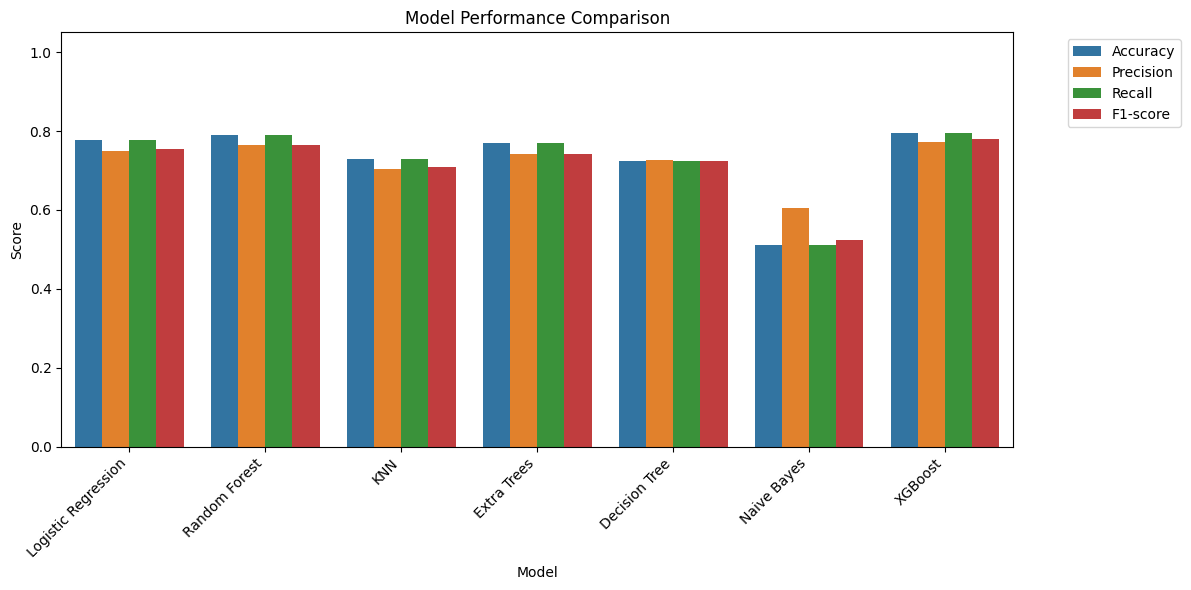

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 5. Visualization
# --------------------------

plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Plot each metric side by side
results_melted = results_df.melt(id_vars="Model", value_vars=metrics,
                                 var_name="Metric", value_name="Score")

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)   # since all scores are between 0 and 1
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --------------------------
# Optional: ROC-AUC comparison (if binary classification)
# --------------------------
if results_df["ROC-AUC"].notna().any():
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x="Model", y="ROC-AUC", palette="viridis")
    plt.title("ROC-AUC Comparison Across Models")
    plt.ylabel("ROC-AUC")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()
